In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
sys.path.insert(0, '../../src/')
from data_loader import load_data

## Findings
- "HomeDescription" column => entries are not consistent
- "Person1Type" column => couldn't find the meaning of the column
- "Period" column => larger than 4 mean overtime

Increasing trend in number of players that scored at least one point per season. Similar applied to the number of substitutions per game. Most overtime games were played in 2006-07 season (88) whereas least overtime games were played in 2017-18 season (61).

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
seasons = load_data()

In [5]:
def hour_int(data):
    hour, _ = data.split(":")
    return int(hour)

In [7]:
seasons["HOUR"] = seasons["WCTIMESTRING"].apply(hour_int)

In [36]:
per_season_stats = {}

per_season_stats['games played'] = seasons.groupby("season_name")['GAME_ID'].nunique()
per_season_stats["overtime games"] = seasons[seasons["PERIOD"] >= 5].groupby("season_name")["GAME_ID"].nunique()
per_season_stats["regular games"] = per_season_stats['games played'] - per_season_stats["overtime games"]
per_season_stats["num players scored"] = seasons[(seasons["EVENTMSGTYPE"] == "FIELD_GOAL_MADE") | (seasons["EVENTMSGTYPE"] == "FREE_THROW")].groupby("season_name")["PLAYER1_ID"].nunique()
per_season_stats["substitutions"] = seasons[seasons["EVENTMSGTYPE"] == "SUBSTITUTION"].groupby("season_name")["EVENTMSGTYPE"].count()
per_season_stats["substitutions per game"] = per_season_stats["substitutions"] / per_season_stats["games played"]
per_season_stats["miswritten times"] = seasons[seasons["HOUR"] > 12].groupby("season_name")["GAME_ID"].nunique()


per_season_stats = pd.DataFrame(per_season_stats)
per_season_stats


,games played,overtime games,regular games,num players scored,substitutions,substitutions per game,miswritten times
season_name,,,,,,,
2000-01,1189,83,1106,435,43037,36.195963,8.0
2001-02,1189,70,1119,438,42696,35.909167,108.0
2002-03,1189,86,1103,420,43090,36.240538,323.0
2003-04,1189,71,1118,438,44363,37.311186,110.0
2004-05,1230,79,1151,460,48250,39.227642,158.0
2005-06,1230,86,1144,453,48125,39.126016,97.0
2006-07,1230,88,1142,453,48841,39.708130,116.0
2007-08,1230,64,1166,450,46853,38.091870,83.0
2008-09,1230,70,1160,444,46110,37.487805,100.0


<AxesSubplot:title={'center':'Number of players that scored at least a point in a season'}, xlabel='season_name'>

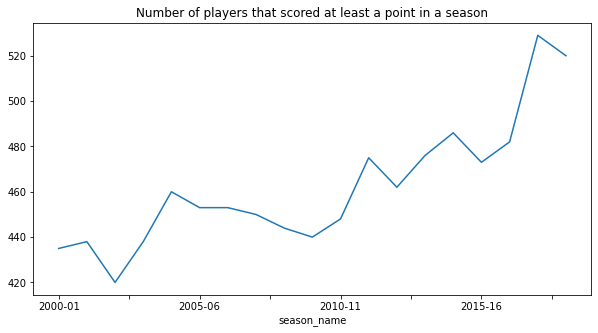

In [7]:
per_season_stats["num players scored"].plot(figsize=(10,5), title="Number of players that scored at least a point in a season")

<AxesSubplot:title={'center':'Number of substitutions per season'}, xlabel='season_name'>

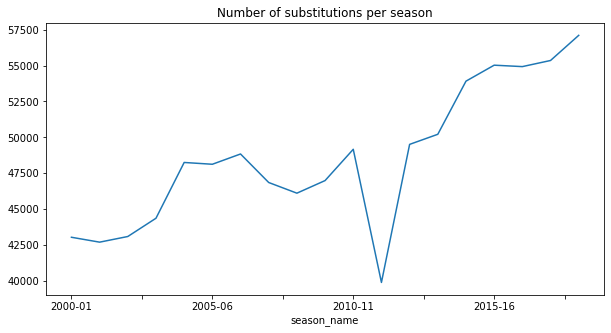

In [8]:
per_season_stats["substitutions"].plot(figsize=(10,5), title="Number of substitutions per season")

<AxesSubplot:title={'center':'Number of substitutions per game per season'}, xlabel='season_name'>

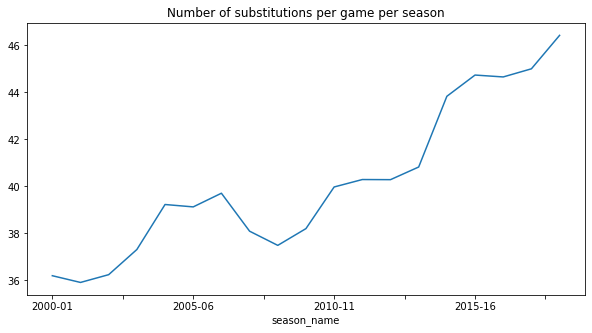

In [9]:
per_season_stats["substitutions per game"].plot(figsize=(10,5), title="Number of substitutions per game per season")

<AxesSubplot:title={'center':'Number of games finished in overtime per season'}, xlabel='season_name'>

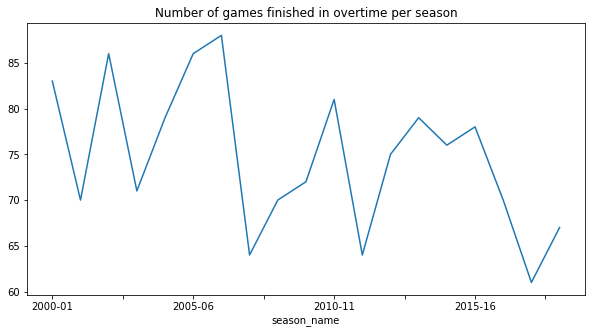

In [10]:
per_season_stats["overtime games"].plot(figsize=(10,5), title="Number of games finished in overtime per season")

<AxesSubplot:title={'center':'Comparison between games finished in regulartime and overtime per season'}, xlabel='season_name'>

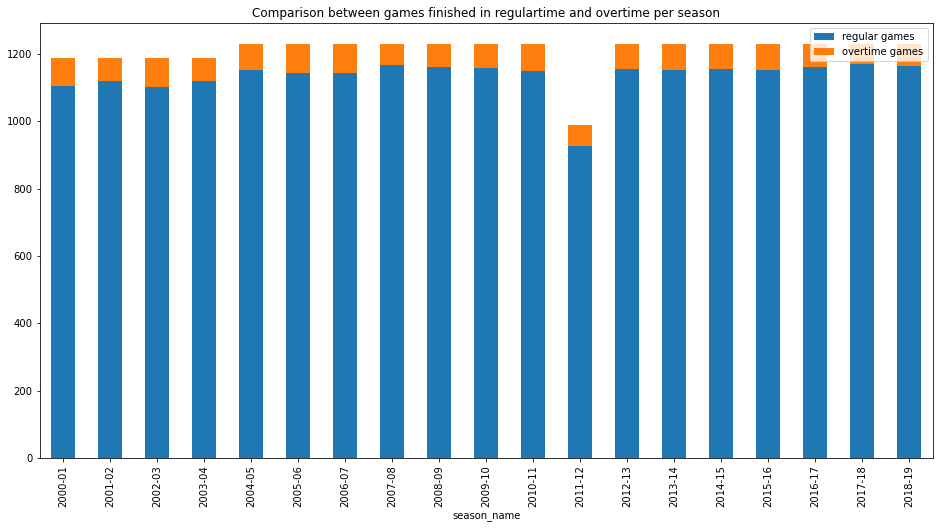

In [11]:
per_season_stats[["regular games", "overtime games"]].plot.bar(stacked=True, figsize=(16,8), title = "Comparison between games finished in regulartime and overtime per season")